In [55]:
import numpy as np
import pandas as pd
import seaborn as sns

In [56]:
data = pd.read_csv('./diamonds.csv')

In [57]:
print(data.shape)
data.head()

(53940, 11)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [58]:
data.drop(data.columns[0], axis=1, inplace=True)

<AxesSubplot:xlabel='depth', ylabel='Count'>

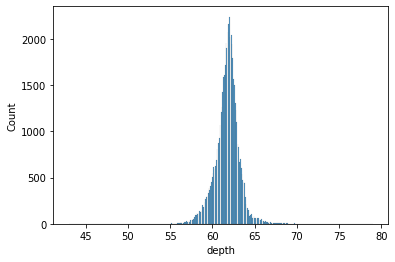

In [59]:
sns.histplot(data['depth'])

In [60]:
data['depth'].describe()

count    53940.000000
mean        61.749405
std          1.432621
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

In [61]:
data['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [62]:
data = data.sample(frac=1).reset_index(drop=True)

y = data['price']
X = data.drop(columns='price')

In [155]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X.shape, X_train.shape, X_test.shape

((53940, 9), (36139, 9), (17801, 9))

In [134]:
print(len(X_train['cut'].unique()), len(X_train['color'].unique()), len(X_train['clarity'].unique()))
print(len(X_test['cut'].unique()), len(X_test['color'].unique()), len(X_test['clarity'].unique()))

5 7 8
5 7 8


### OneHotEncoder vs LabelEncoder:
https://contactsunny.medium.com/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621

In [156]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_features = ['carat','depth', 'table', 'x', 'y', 'z']
numeric_transformer = Pipeline(steps=[
    #('minmax', MinMaxScaler())  # <- better results on training_set but not on testing
    #('standard', StandardScaler())
    ('robust', RobustScaler())
    ,('standard', StandardScaler())
    ])

categorical_features = ['cut', 'color', 'clarity']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

pre = Pipeline(steps=[('preprocessor', preprocessor)])

X_train = pd.DataFrame(pre.fit_transform(X_train))
X_test = pd.DataFrame(pre.transform(X_test))


In [157]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
#from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

lr = LinearRegression()
r = Ridge(alpha=2)
l = Lasso(alpha=2)
en = ElasticNet()
#svr = SVR()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()

In [158]:
lr.fit(X_train, y_train)
r.fit(X_train, y_train)
l.fit(X_train, y_train)
en.fit(X_train, y_train)
#svr.fit(X_train, y_train)
dtr.fit(X_train, y_train)
rfr.fit(X_train, y_train)

RandomForestRegressor()

### Using only MinMax_Scaler at preprocessing

In [152]:
from sklearn.metrics import r2_score

print('lr', r2_score(lr.predict(X_test), y_test))
print('r', r2_score(r.predict(X_test), y_test))
print('l', r2_score(l.predict(X_test), y_test))
print('en', r2_score(en.predict(X_test), y_test))
#print('svr', r2_score(svr.predict(X_test), y_test))
print('dtr', r2_score(dtr.predict(X_test), y_test))
print('rfr', r2_score(rfr.predict(X_test), y_test))

lr 0.9134931773759678
r 0.9107862030955702
l 0.9090536782883251
en -100.4333650792478
dtr 0.9621642340984302
rfr 0.9797994247293096


### using only Standard_Scaler at preprocessing

In [144]:
from sklearn.metrics import r2_score

print('lr', r2_score(lr.predict(X_test), y_test))
print('r', r2_score(r.predict(X_test), y_test))
print('l', r2_score(l.predict(X_test), y_test))
print('en', r2_score(en.predict(X_test), y_test))
#print('svr', r2_score(svr.predict(X_test), y_test))
print('dtr', r2_score(dtr.predict(X_test), y_test))
print('rfr', r2_score(rfr.predict(X_test), y_test))

lr 0.9134709921440626
r 0.9134370362762251
l 0.9130230165900362
en 0.6992846526593395
dtr 0.9622296637160365
rfr 0.9795099022765172


### Using only Robust_Scaler at preprocessing

In [138]:
from sklearn.metrics import r2_score

print('lr', r2_score(lr.predict(X_test), y_test))
print('r', r2_score(r.predict(X_test), y_test))
print('l', r2_score(l.predict(X_test), y_test))
print('en', r2_score(en.predict(X_test), y_test))
#print('svr', r2_score(svr.predict(X_test), y_test))
print('dtr', r2_score(dtr.predict(X_test), y_test))
print('rfr', r2_score(rfr.predict(X_test), y_test))

lr 0.9134730813473048
r 0.9134037320727547
l 0.9128994533712734
en 0.5274983648668314
dtr 0.9618006105843147
rfr 0.9796627124218238


### Using Robust_Scaler + Standard_Scaler at preprocessing

In [159]:
from sklearn.metrics import r2_score

print('lr', r2_score(lr.predict(X_test), y_test))
print('r', r2_score(r.predict(X_test), y_test))
print('l', r2_score(l.predict(X_test), y_test))
print('en', r2_score(en.predict(X_test), y_test))
#print('svr', r2_score(svr.predict(X_test), y_test))
print('dtr', r2_score(dtr.predict(X_test), y_test))
print('rfr', r2_score(rfr.predict(X_test), y_test))

lr 0.9134749762780239
r 0.9134370362762249
l 0.9130230165900363
en 0.6992846526593396
dtr 0.9622801824779383
rfr 0.9797400253055072


In [91]:
from sklearn.model_selection import GridSearchCV

search_space = {
      "n_estimators": [50,100,150],
      "criterion":['mse', 'mae'],
      "max_features":['auto', 'log2'],
      "bootstrap":[True, False]
      }

In [92]:
grid = GridSearchCV(estimator=RandomForestRegressor(), 
                    param_grid=search_space,
                    cv=3,
                    scoring='r2',
                    return_train_score=True,
                    n_jobs=-1,  # AUC == ROC
                    #verbose=10
                    ) 

In [93]:
best_model = grid.fit(X_train,y_train)

In [94]:
print(best_model.best_params_)

{'bootstrap': True, 'criterion': 'mse', 'max_features': 'auto', 'n_estimators': 150}


### Using only MinMax_Scaler at preprocessing

In [153]:
rfr_best = RandomForestRegressor(n_estimators=150)

rfr_best.fit(X_train, y_train)

print('rfr_best', r2_score(rfr_best.predict(X_test), y_test))

rfr_best 0.9796684509695696


### Using Robust_Scaler + Standard_Scaler at preprocessing

In [160]:
rfr_best = RandomForestRegressor(n_estimators=150)

rfr_best.fit(X_train, y_train)

print('rfr_best', r2_score(rfr_best.predict(X_test), y_test))

rfr_best 0.9797399904893992


In [125]:
import matplotlib.pyplot as plt

y_predicted = rfr_best.predict(X_test)
y_official = y_test.values

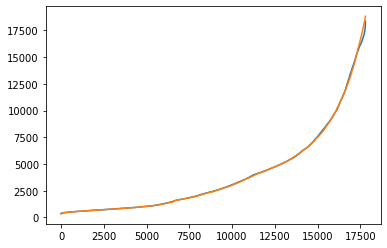

In [131]:
x = range(len(y_predicted))

plt.plot(x, np.sort(y_predicted))
plt.plot(x, np.sort(y_official))